## RCES 2018 Final Project
### Miranda Cashman (mc4428)
## Last Interglacial sea level at Barbados:  Can we constrain melt contributions from Greenland and Antarctica?


Reconstructions of global mean sea level (GMSL) for the Last Interglacial indicate that sea level may have been between 6 and 9 m higher than today.  Better constraining sea level over the Last Interglacial will help constrain models of future sea level rise.  A large contributer to the uncertainty in Last Interglacial sea level is that the melt contribution from the Greenland and Antarctic ice sheets is unknown.  I used the Hibbert et al., 2016 fossil coral database for sea level reconstructions to test 12 likely melt scenarios for the Last Interglacial, each with different melth contributions from the Greenland and Antarctic ice sheets.  Fossil coral reefs are commonly used as sea level indicators because corals grow close to the sea surface and can be dated by U/Th methods.  I tested the 12 melt scenarios on two datasets:  first, Barbados MIS 5 fossil coral data, and second, a subset of the Barbados MIS 5 dataset that looks only at corals thought to be pristine (higher confidence in the U/Th age).  When testing the entire dataset against the 12 melt scenarios, 2 of the scenarios appear to not match the geologic evidence.  However, the results of the second filtered dataset yield dramatically different results, indicating that all 12 of the melt scenarios agree with the geologic evidence.  I explain the difference in results to a lack of  pristine dates for Barbados.  A more robust dataset of pristine coral dates would reduce the weight of outliers, while also maintaining high confidence in the age data.  


In [1]:
#Import relevant pacakges 
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
%matplotlib inline 

#I downloaded an excel file reader:
import xlrd

In [2]:
#Download link for the data
! wget 'https://ars.els-cdn.com/content/image/1-s2.0-S0277379116301305-mmc1.xlsx'

--2018-12-06 17:17:42--  https://ars.els-cdn.com/content/image/1-s2.0-S0277379116301305-mmc1.xlsx
Resolving ars.els-cdn.com (ars.els-cdn.com)... 184.28.79.64
Connecting to ars.els-cdn.com (ars.els-cdn.com)|184.28.79.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2093003 (2.0M) [application/excel]
Saving to: ‘1-s2.0-S0277379116301305-mmc1.xlsx.1’

1-s2.0-S02773791163 100%[===================>]   2.00M  11.6MB/s    in 0.2s    

2018-12-06 17:17:42 (11.6 MB/s) - ‘1-s2.0-S0277379116301305-mmc1.xlsx.1’ saved [2093003/2093003]



## Barbados
The earliest sea level reconstruction studies were done on Barbados and proposed estimates for Last Interglacial sea level.  Barbados is an uplift island that is comprised of fossil coral terrace.  These terraces were built as coral reefs grew up to sea surface, and then were stranded by uplift and sea level fall.  The terraces of Barbados each record sea levels back through time.  Since paleo sea level reconstruction research largely began on Barbados, subsequently there has been extensive work on Barbados, and so the fossil coral database is robust for Barbados. 

My Ph.D. is also largely focused on Barbados.  Much of the island's morphology is complex, and ages are outdated.  I will be working on updating and re-interpreting the sea level record on Barbados. 


#### Loading and Cleaning Data
The Hibbert et al., 2016 dataset is a compilation of all published fossil coral data used in sea level reconstruction studies.  The dataset was originally published as an Excel file, and was never meant to be loaded into code so it required extra steps to open and clean the dataset before I could use it.

#### Methods:
- Load xlsx with xlrd reader and define NaN values (there are many keywords that I listed as NaN values.  Most became apparent as I worked through the dataset)
- Create a new dataframe of just Barbados data
- Delete unwanted/unneeded columns 
- On relevant parameters, renamed to remove spaces in the column headers 
- Changed the datatype from objects or strings to float type on columns with numerical data

In [3]:
#reading the excel document into a Pandas dataframe
hibbert_ds = pd.read_excel('1-s2.0-S0277379116301305-mmc1.xlsx', sheet_name ='Database', 
                           na_values=['unknown', 'not reported', ' not reported', 
                            'not reported ', "can't calculate", "unknown (can't calculate)", 
                            "no specific info; info for averaged replicates.", 'infinite', 
                            'INFINITE', '>400', np.nan])
#Creating a new dataframe of just Barbados data
barbados = hibbert_ds[hibbert_ds.Location == 'Barbados']

In [4]:
#Delete unneeded columns
barbados = barbados.drop(columns=['ID', 'Source', 'Latitude', 'Longitude', 'Tectonic Category', 
                    'Comments (uplift)', 'Original elevation datum used', 'How elevation derived?', 
                    'Elevation uncertainty reported in original references', 
                    'Elevation obtained from other references', 
                    'Elevation uncertainty reported in other references', 
                    'Comments (elevation)', 'Comments (elevation error)',
                    'Explicitly state reef crest/top targeted in original sampling?', 
                    'additional sample information', 'Stratigraphic constraints available?', 
                    'Species', 'Comments (species)', 'Median depth (m)', 'lower error (95%)',
                    'upper error (95%)', 'lower error (68%)', 'upper error (68%)', 
                    'modern depth distribution (assemblage or other) study undertaken? ', 
                    'type (coral, coralgal, foram, modern depth distribution etc.)', 
                    'scale (site, local, regional)', 'given assemblage (as originally reported)', 
                    'Fossil assemblage (or principal faunal composition) study undertaken? ',
                    'original palaeo-depth interpretation', 
                    'used in original palaeo sea level reconstruction (or error)?', 'Replicate', 
                    'comments (replicate)', 'Pa/Th age?', '14C age?', 'Instrument', 'Decay cnsts', 
                    'comments (decay constant)','Spike Calib', 'comments (spike calibration)', 
                    '% calcite', 'determined by', '(232Th /238U)*10^5', '[238U] (ppm)',
                    '[238U] uncert. (±2σ)', '[230Th/234U]ACT', '[230Th/234U]ACT uncert. (±2σ)', 
                    'Reported age comments', 'Recalculated [230Th/238U]ACT', 
                    'Recalculated [230Th/238U]ACT uncert. (±2σ)', 'Recalculated [234U/238U]ACT',
                    'Recalculated [234U/238U]ACT uncert. (±2σ)', 'Recalculated Conventional Age (ka)', 
                    'Comment (age and δ234Uinitial)','Recalculated Conventional Age uncert. (±2σ)', 
                    'Recalculated Conventional Age uncert. (±1σ)', 
                    'Recalculated Conventional Age uncert. (±2σ) includes decay cnst. uncert.', 
                    'Recalculated Conventional Age uncert. (±1σ) includes decay cnst. uncert.', 
                    'Recalculated ẟ234U initial (‰)','Recalculated ẟ234U initial uncert. (±2σ)', 
                    'Recalculated ẟ234U initial uncert. (±2σ) includes decay cnst. uncert.', 
                    'Zcp Comments', 'PRSL (m)', '+3σPRSL ', '-3σPRSL ', '+2σPRSL', '-2σPRSL', 
                    '+1σPRSL', '-1σPRSL', 'PRSL Comments (in addition to Zcp comments)', 
                    'Reported ẟ234U initial (‰)']);

#Rename columns
barbados = barbados.rename(index=str, columns={'Elevation Used (m)': 'elevation', 
                                        'Elevation reported in orignial reference': 'ele_ref', 
                                        'Elevation uncertainty used (m)': 'ele_uncert',
                                        'decimal latitude': 'dec_lat',
                                        'decimal longitude': 'dec_lon',
                                        'Reported [230Th/238U]ACT': 'Th230_U238_act_ref',
                                        'Reported [230Th/238U]ACT uncert. (±2σ)': 'Th230_U238_act_2sig_ref',
                                        '[230Th/238U]ACT back calculated?': 'Th230_U238_bc',
                                        'Reported [234U/238U]ACT': 'U234_U238_act_ref',
                                        'Reported [234U/238U]ACT uncert. (±2σ)': 'U234_U238_act_2sig_ref',
                                        'Terrace Identification': 'terrace'})

#Convert to numeric data type
headers = ["elevation", "ele_uncert", "dec_lat", "dec_lon", "Th230_U238_act_ref", 
           "Th230_U238_act_2sig_ref", "U234_U238_act_ref", "U234_U238_act_2sig_ref"]
barbados[headers] = barbados[headers].apply(pd.to_numeric)

## Age Calculation 
Each sample in the dataframe have isotopic data, specifically the activity ratios of $^{234}U/^{238U}$ and $^{230Th}/^{238U}$.  From these two ratios, we can calculate the age of the samples.  While the Hibbert dataset has their own recalculated ages, I wanted to recalculate the ages myself.  The age calculation differs depending on if the coral displays "open system" or "closed system" behavior.  If a sample is closed system, this means there was no diagenetic alteration of the isotopes, and therefore the isotopes accurately yield the age of the sample.  If the sample is openy system, this means that there has been alteration to the isotope ratios and therefore the age calculation could yield false ages.  

One reliable screening method that can determine open or closed system behavior is the back-calculated d234 initial of the sample.  If the back-calculated $\delta^{234}$U intial is within 8 per mil of modern sea water, we consider the coral to be 'closed system,' but if the $\delta^{234}$U falls outside of that range, we consider it 'open system.'

## The Last Interglacial and Marine Isotope Stage 5 (MIS 5)
Marine Isotope Stage 5 (MIS 5) is the period of Earth history from ~130 ka to ~75 ka.  MIS 5e displays suborbital variability (many oscillations within this span that cannot be explained by orbital cycles/forcing), and is thus broken into 5 substages:  5a, 5b, 5c, 5d, and 5e (youngest to oldest).  MIS 5e, or the Last Interglacial, is of particular interest because this is the last time the Earth was warmer than today and sea level was higher than present.  I chose to focus on the entire MIS 5 period as it is preserved on Barbados because much prior research has dated the substages of MIS 5, providing a good dataset for my meltwater scenario tests.

#### Methods:
- Filter out any enteries without isotope ratios reported (null values)
- Define an age calculator function utilizing vectorization and apply to Barbados dataframe; append the dataframe with 'conv_age'
- Calculate the $\delta^{234}$U for each sample and append the dataframe
- Filter out highly altered samples ($\delta^{234}$U initial > 200 or < 90)
- Define a function that saves the 'true age.' For open system samples, the age will be recalculated using Thompson et al., 2003 Open System Correction (Thompson_age).  Closed system corals return the conventional age calcuatled in the part before.  Append dataframe with 'age_ka'
- Isolate MIS 5 corals from the age_ka parameter
- Figure 1 shows the closed system evolution of the U/Th decay series as well as the full Barbados dataset highlighting the Barbados MIS 5 corals and the open system and closed system corals

In [5]:
#Filter out entries with NaN values in ratio categories
barbados = barbados[pd.notnull(barbados['U234_U238_act_ref'])]
barbados = barbados[pd.notnull(barbados['Th230_U238_act_ref'])]

In [6]:
#Define decay constants
L238 = 1.55125e-10 #decay constant of 238U
L234 = 2.82203e-6  #decay constant of 234U
L230 = 9.17055e-6  #decay constant of 230Th
U234_U238_SW = 1.1466  #234U/238U of seawater today (also considered intial 234U/238U)

#Create function that calculates conventional age through iteration
def conv_age(Th_U, U_U, N=barbados.shape[0]):
    all_ages = np.array([np.linspace(0, 600000, N)]*np.array(Th_U).size).T
    calc_ages = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(np.exp(-L234*all_ages)-
                                            np.exp(-L230*all_ages))*(U_U-1)*np.exp(L234*all_ages))
    residual = abs(calc_ages - all_ages)
    ans = np.argsort(np.abs(residual), axis=0)[0,:]
    return np.diagonal(all_ages[ans])


In [7]:
#Calculate the conventional ages for all barbados samples
barbados['conv_age'] = conv_age(barbados['Th230_U238_act_ref'].values, barbados['U234_U238_act_ref'].values)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [8]:
#Define function to calculate the d234U_initial for each sample
def d234i_calc(U_U, conv_age):
    d234m = ((U_U*(L238/L234))/(L238/L234)-1)*1000
    d234Ui = d234m*np.exp(L234*conv_age)
    return d234Ui

In [9]:
#Calculate the d234U initial
barbados['d234Ui'] = d234i_calc(barbados['U234_U238_act_ref'], barbados['conv_age'])

In [10]:
#Filter out very diagenetically altered data
barbados = barbados[barbados.d234Ui < 200]
barbados = barbados[barbados.d234Ui > 90]

In [11]:
#Create function that calculates the sample age - either the conventional age already calcualted, or calculating the open system corrected age
def Thompson_age(d234i, conv_age, Th_U, U_U):
    if d234i > (146.8-8) and d234i < (146.8+8):
        return conv_age
    else:
        test_age = []
        ans = 3
        residual = 4
        for i in range(1, 100000):
            test_age.append(conv_age-i)
            test_age.append(conv_age+i)
        for j in range(0, len(test_age)):
            f234 = (U_U-U234_U238_SW*np.exp(-L234*test_age[j]))/(1-np.exp(-L234*test_age[j]))
            if f234 < 1:
                m = (1-f234)*(1-np.exp(-L234*test_age[j]))/((1-f234*((f234-1)*
                                    (4.754*234/4.184/230)+1))*(1-L230/(L230-L234)*
                                    np.exp(-L234*test_age[j])+L234/(L230-L234)*
                                    np.exp(-L230*test_age[j]))+(1-((f234-1)*
                                    (4.754*234/4.184/230)+1))*(L230/(L230-L234)*U234_U238_SW*
                                    (np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))))
                
                Tage1 = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(U234_U238_SW-1)*
                                    (np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))+1/m*
                                    (U_U-((U234_U238_SW-1)*np.exp(-L234*test_age[j])+1)))
                
                if residual > abs(Tage1 - test_age[j]):
                    residual = abs(Tage1 - test_age[j])
                    ans = test_age[j]
            elif f234 > 1:
                f234_rep = 0.975
                Lratio = 0.9730500769
                m = (1-f234_rep)*(1-np.exp(-L234*test_age[j]))/((1-f234_rep*Lratio)*(1-L230/(L230-L234)*
                                    np.exp(-L234*test_age[j])+L234/(L230-L234)*
                                    np.exp(-L230*test_age[j]))+(1-Lratio)*(L230/(L230-L234)*U234_U238_SW*
                                    (np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))))
                
                Tage2 = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(U234_U238_SW-1)*
                                    (np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))+1/m*
                                    (U_U-((U234_U238_SW-1)*np.exp(-L234*test_age[j])+1)))
                
                if residual > abs(Tage2 - test_age[j]):
                    residual = abs(Tage2 - test_age[j])
                    ans = test_age[j]
        return ans

In [12]:
#Calculate the sample age
age = [Thompson_age(d, t, x, y) for (d, t, x, y) in zip(*[barbados['d234Ui'], barbados['conv_age'], 
                                                 barbados['Th230_U238_act_ref'], barbados['U234_U238_act_ref']])]
bindex = barbados.index.tolist()
barbados['age_ka'] = pd.Series(age, index=bindex)
barbados['age_ka'] = barbados['age_ka']/1000 #change ages from years to kyrs

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


In [13]:
#Isolate MIS 5
barbados_mis5 = barbados[barbados.age_ka >= 75]
barbados_mis5 = barbados_mis5[barbados_mis5.age_ka <= 135]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


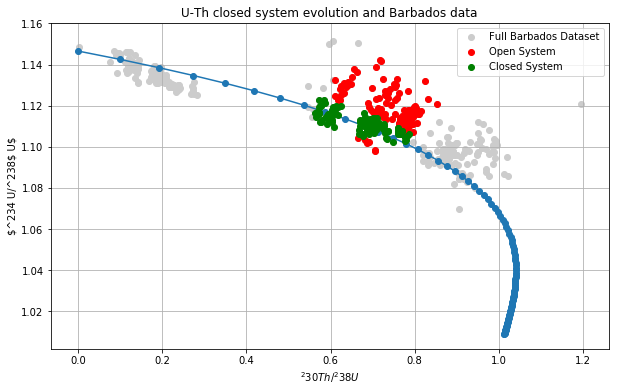

In [14]:
#Data for the U/Th decay evolution
U234_U238_ev = []
for i in range(0, 1000000, 10000):
    a = ((U234_U238_SW-1)*(np.exp(-L234 * i))+1)
    U234_U238_ev.append(a)

Th230_U238_ev = []
for i, j in zip(range(0, 1000000, 10000), U234_U238_ev):
    b = +(1-(np.exp(-L230*i)))+(L230/(L230-L234))*(j-1)*(1-(np.exp(-(L230-L234)*i)))
    Th230_U238_ev.append(b)

#Barbados MIS 5 open and closed system ages
barbados_closed = barbados_mis5[barbados_mis5.d234Ui > (146.8-8)]
barbados_closed = barbados_closed[barbados_mis5.d234Ui < (146.8+8)]
b_open1 = barbados_mis5[barbados_mis5.d234Ui < (146.8-8)]
b_open2 = barbados_mis5[barbados_mis5.d234Ui > (146.8+8)]
barbados_open = pd.concat([b_open1, b_open2])
    
    
#Plotting the closed system
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Th230_U238_ev, U234_U238_ev, marker='o')
ax.set_xlabel(f'$^{230} Th/^{238} U$')
ax.set_ylabel(f'$^{234} U/^{238}$ U$')
ax.set_title('U-Th closed system evolution and Barbados data')
ax.grid()

#Plotting the published values from Hibbert
p1 = ax.scatter(barbados['Th230_U238_act_ref'], barbados['U234_U238_act_ref'], color='0.8', zorder=1)
p2 = ax.scatter(barbados_open['Th230_U238_act_ref'], barbados_open['U234_U238_act_ref'], color='red', zorder=2)
p3 = ax.scatter(barbados_closed['Th230_U238_act_ref'], barbados_closed['U234_U238_act_ref'], color='green', zorder=3)
ax.legend((p1, p2, p3), ('Full Barbados Dataset', 'Open System', 'Closed System'))

#### Figure 1.
The Barbados MIS 5 aged samples plotted on the closed system evolution of the U/Th isotope decay system assuming an initial $^{234}$U/$^{238}$U of 1.1466 (modern seawater value).  Samples plotted include: MIS 5e data that I treated as closed system (green) MIS 5e data open system corrected by methods described in Thompson et al., 2003 (red); other Barbados samples that are not 5e age (after correction) (grey). 

## 12 Ice Sheet Melt Scenarios
I wanted to test a small suite of ice melt scenarios for MIS 5e as a way to see if relative sea level predictions could match geologic data.  Using the calculations of meltwater from Vermeersen and Schotman 2009 and assumptions about GMSL from the literature (Dutton et al., 2015; Kopp et al., 2009), I choose 12 melt contributions from Greenland and Antarctica for the Last Interglacial to test.

I assumed a GMSL of 7m and 8m from the work of Kopp et al., 2009 which found that Last Interglacial sea level was likely 6.6+m (95% confidence) to 8+m (67% confidence) and not likely 9.4+m.  
I chose to run 6 scenarios for 7m and 8m (12 total) where I vary the contribution of melt from Greenland from 0 to 5m of the total GMSL estimate of 7 and 8 (the remaining coming from one of the Antarctic ice sheets).  Most models agree that the Greenland ice sheet (GIS) was not nore than 5m, with more studies agreeing ~3m GIS contribution.

## Relative Sea Level Calculations (Vermeersen and Schotman, 2009)
I use a calculation that takes the distance of a given location to an ice sheet and calculates the degree to which that site will be affected by ice mass loss of the ice sheet with and without self graviation (termed the H-value).  This model of the 'sea level figerprint' was taken from Bermeersen and Schotman (2009).  

$ H-value = \frac{\epsilon_{1}{\epsilon_{E} \frac{\frac{1}{2sin(\theta/2}-1-\frac{\rho_{E}{3\rho_{w}}{\frac{\rho_{E}}{3\rho_{w}} $

H tells the response of a given location (based on distance from ice sheet) as how much relative sea level change may be observed during ice sheet growth (sea level fall) comapred to the GMSL.


#### Methods:
- Found the distance of Barbados to the GIS and the Antarctic ice sheet (AAIS)
- Cacluated the H value for GIS and AAIS to Barbados
- Figure 2 shows the relative locations of GIS, Barbados, and AAIS
- Created 12 scenarios with different GIS and AAIS contributions assuming 7m and 8m GMSL
- Calculated the predicted relative sea level (RSL) at Barbados, and crated a dataframe for all the scenario information

GIS lat and lon from:  https://latitude.to/articles-by-country/gl/greenland/43004/summit-camp

AAIS lat and lon from: https://latitude.to/articles-by-country/aq/antarctica/5205/antarctic-ice-sheet


In [15]:
#Coordinates
GIS_coords = {'lat': 72.574414869, 'lon': -38.4555098446}
AAIS_coords = {'lat': -90, 'lon': 0}
BB_coords = {'lat': 13.1939, 'lon': -59.5432}

#Other information
R = 6371 #km, radius of earth
pEarth = 5.51 * (100**3/1000) #kg/m^3, density of Earth
pWater = 1000 #kg/m^3, density of water (SW average)

In [16]:
#use haversine to calc distance between lats and lons

def haversine_form(radius, latitude1, longitude1, latitude2, longitude2):
    lat1 = np.deg2rad(latitude1)
    lon1 = np.deg2rad(longitude1)
    lat2 = np.deg2rad(latitude2)
    lon2 = np.deg2rad(longitude2)
    h = 2*radius*np.arcsin(np.sqrt(np.sin((lat2-lat1)/2)**2+np.cos(lat1)*
                                   np.cos(lat2)*np.sin((lon2-lon1)/2)**2))
    return h

In [17]:
#Calculated from lat/lon at the site cited above
GIS_dist = haversine_form(R, BB_coords['lat'], BB_coords['lon'], GIS_coords['lat'], GIS_coords['lon'])
AAIS_dist = haversine_form(R, BB_coords['lat'], BB_coords['lon'], AAIS_coords['lat'], AAIS_coords['lon'])

#Central angle, in degrees
GIS_theta = GIS_dist/(2*np.pi*R)*360 
AAIS_theta = AAIS_dist/(2*np.pi*R)*360  

#H-value for GIS and AAIS
H_GIS = (((1/(2*np.sin(np.deg2rad(GIS_theta)/2))))-1-(pEarth/(3*pWater)))/(pEarth/(3*pWater))
H_AAIS = (((1/(2*np.sin(np.deg2rad(AAIS_theta)/2))))-1-(pEarth/(3*pWater)))/(pEarth/(3*pWater))

Text(0.5,1,'Spatial relationships between Barbados and ice sheets')

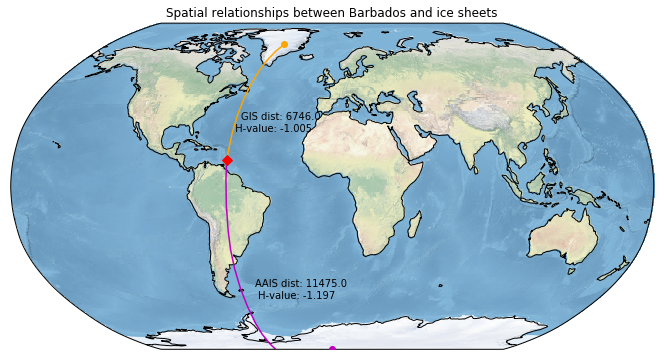

In [18]:
#Global look at AAIS, GIS, and Barbados
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.stock_img()

ax.scatter(x=GIS_coords['lon'], y=GIS_coords['lat'], transform=ccrs.PlateCarree(), zorder=10, color='orange')
ax.scatter(x=AAIS_coords['lon'], y=AAIS_coords['lat'], transform=ccrs.PlateCarree(), zorder=10, color='m')
ax.scatter(x=BB_coords['lon'], y=BB_coords['lat'], transform=ccrs.PlateCarree(), zorder=10, color='r', s=50, marker='D')
ax.plot([GIS_coords['lon'], BB_coords['lon']], [GIS_coords['lat'], BB_coords['lat']], transform=ccrs.Geodetic(), color='orange')
ax.plot([AAIS_coords['lon'], BB_coords['lon']], [AAIS_coords['lat'], BB_coords['lat']], transform=ccrs.Geodetic(), color='m')
ax.text(-54, 33, 'GIS dist: '+str(round(GIS_dist)), transform=ccrs.Geodetic())
ax.text(-58, 27, ' H-value: '+str(round(H_GIS, 3)), transform=ccrs.Geodetic())
ax.text(-50, -50, 'AAIS dist: '+str(round(AAIS_dist)), transform=ccrs.Geodetic())
ax.text(-50, -56, 'H-value: '+str(round(H_AAIS, 3)), transform=ccrs.Geodetic())
ax.set_title('Spatial relationships between Barbados and ice sheets')


### Figure 2.
The spatial relationships between Barbados (red diamond) and GIS (orange) and AAIS (purple).  Distances and H-values also listed.

In [19]:
#creating the scenarios
GIS = [0, 1, 2, 3, 4, 5]
AAIS_7m = [6, 5, 4, 3, 2, 1]
AAIS_8m = [7, 6, 5, 4, 3, 2]

In [20]:
#Calculating the relative sea level expected for each scenario
RSL_7m = []
RSL_8m = []

for i, j in zip(GIS, AAIS_7m):
    rsl = (H_AAIS*-j)+(H_GIS*-i)+1
    RSL_7m.append(rsl)

for i, j in zip(GIS, AAIS_8m):
    rsl = (H_AAIS*-j)+(H_GIS*-i)+1
    RSL_8m.append(rsl)

rsl_data = {'GIS_contribution': GIS, 'AAIS_7m_contribution': AAIS_7m, 'RSL_7m': RSL_7m, 'AAIS_8m_contribution': AAIS_8m, 'RSL_8m': RSL_8m}
scenarios = pd.DataFrame(rsl_data)
scenarios

,GIS_contribution,AAIS_7m_contribution,RSL_7m,AAIS_8m_contribution,RSL_8m
0,0,6,8.182474,7,9.379553
1,1,5,7.990861,6,9.187940
2,2,4,7.799247,5,8.996326
3,3,3,7.607634,4,8.804713
4,4,2,7.416020,3,8.613099
5,5,1,7.224407,2,8.421486


## Calculating Uplift
To test the 'viability' of my scenarios, I want to compare the relative sea level predicted by the Vermeersen and Schotman RSL calculation and the geologic data.  To get the relative sea level from the geologic data, I calculate the uplift rate using the average age and elevation for each terrace, and correct the terrace elevation for the estimated RSL for each scenario.  From the uplift rate, we can calculate the RSL for Barbados.  This creates a bit of circular logic since RSL predicted is going into calculating the RSL observed.  

The uplift on Barbados has been constant over the past 150 kyrs, but each section of the island experiences different rates of uplift (due to the subduction and tectonics of the region).  I therefore choose to treat the west coast and south coast samples differently, and calculate different uplift rates for each sector of the island.

#### Methods:
- Assign each sample a coast parameter (W or S)
- Split the island into west coast and south coast dataframes.  
- Re-assign/overwrite the terrace classification (the Hibbert dataset was never meant to be imported to code, and therefore the terrace classification has extra information included.  This means that samples from the same terrace may be treated as different terraces by groupby).  This step was done manually by visually inspecting the dataset and replacing values
- Calculate the average age and elevation of the MIS 5e terrace
- Figure 3. Plot the average age and elevation of each terrace and the MIS 5e terrace for both the west and south coasts.
- With the MIS 5e terrace average elevation and age, calculate the uplift in each sector of the island assuming my two assumptions of GMSL sea level at the time 

In [21]:
#West and south coast characterization
coast = []
for index, row in barbados_mis5.iterrows():
    if row['dec_lat'] >= 13.1100:
        coast.append('W')
    elif row['dec_lat'] < 13.1100:
        coast.append('S')

bindex_mis5 = barbados_mis5.index.tolist()
barbados_mis5['Coast'] = pd.Series(coast, index=bindex_mis5)

In [22]:
#Adding terrace values to those with NaN based on age
terr_idx = barbados_mis5.columns.get_loc('terrace')
age_idx = barbados_mis5.columns.get_loc('age_ka')

for i in range(0, (barbados_mis5.shape[0]-1)):
    if barbados_mis5.iloc[i, terr_idx] != barbados_mis5.iloc[i, terr_idx]:
        if int(barbados_mis5.iloc[i, age_idx]) in range(75, 85):
            barbados_mis5.iloc[i, terr_idx] = 'Worthing'
        elif int(barbados_mis5.iloc[i, age_idx]) in range(96, 110):
            barbados_mis5.iloc[i, terr_idx] = 'Ventnor'
        elif int(barbados_mis5.iloc[i, age_idx]) in range(115, 130):
            barbados_mis5.iloc[i, terr_idx] = 'Rendezvous Hill'

#Create new dataframes for the south and west coasts
Sbarbados_mis5 = barbados_mis5[barbados_mis5.Coast == 'S']
Wbarbados_mis5 = barbados_mis5[barbados_mis5.Coast == 'W']

In [23]:
#create south terrace groupyby object and print keys
south_terr = Sbarbados_mis5.groupby('terrace')

for key, group in south_terr:
    print(key)

"first terrace above present sea level" (ref 9)
Last Interglacial; not specified (ref 68)
Rendezvous Hill
Rendezvous Hill Terrace
T-1a
T-2
Ventnor
Worthing


In [24]:
#Replace the terrace classifications to standard terraces.  This was done qualitatively and required me to manually rename them
rep_S = ['First Terrace', 'Rendezvous Hill', 'Rendezvous Hill', 'Rendezvous Hill', 'Worthing', 'Worthing', 'Ventnor', 'Worthing']

rep_dic_S = {}
for ((key, group), i) in zip(south_terr, range(0, len(rep_S))):
    rep_dic_S.update({key:rep_S[i]})

for key, group in south_terr:
    for i in range(0, Sbarbados_mis5.shape[0]):
        if Sbarbados_mis5.iloc[i, Sbarbados_mis5.columns.get_loc('terrace')] == key:
            Sbarbados_mis5.iloc[i, Sbarbados_mis5.columns.get_loc('terrace')] = rep_dic_S[key]
    

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
#Create west terrace groupby object and print keys
west_terr = Wbarbados_mis5.groupby('terrace')
for key, group in west_terr:
    print(key)

 'Last interglacial terrace - LOWER' (ref 5); Rendezvous Hill subunit rh1 (ref 4)
 'Last interglacial terrace - MIDDLE' (ref 5); Rendezvous Hill subunit rh3 (ref 4)
'Last interglacial terrace - TOP' (ref 5); Rendezvous Hill subunit rh4 (ref 4)
'Last interglacial terrace - TOP' (ref 5); Rendezvous Hill subunit rh5 (ref 4)
Barbados I (aka Worthing terrace cf. Bender et al 1979)
Barbados I, Worthing Terrace
Barbados II (aka Ventnor terrace cf. Bender et al., 1979)
Barbados II, Ventnor Terrace
Barbados III (ref 7)
Last interglacial terrace - TOP' (ref 5); Rendezvous Hill subunit rh5 (ref 4)
Last interglacial terrace, middle (ref 5); Rendezvous Hill subunit rh2 (ref 4)
Last interglacial terrace, middle (ref 5); Rendezvous Hill subunit rh5 (ref 4)
N1 (wave cut platform)
N1? (wave cut platform)
N2?
N3?
Rendezvous Hill
Rendezvous Hill Terrace
Rendezvous Hill terrace, subunit rh5
Rendezvous Terrace
Site OC (ref 5)
Ventnor
Ventnor Terrace
Worthing
Worthing 
Worthing Terrace
last Interglacial ter

In [26]:
#Replace the terrace classifications to standard terraces.  This was done qualitatively and required me to manually rename them
west_terr = Wbarbados_mis5.groupby('terrace')

rep_W = ['Rendezvous Hill (Low)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Top)', 'Rendezvous Hill (Top)', 'Worthing', 'Worthing',
        'Ventnor', 'Ventnor', 'Rendezvous Hill', 'Rendezvous Hill (Top)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Middle)', 'Batts Rock 1',
        'Batts Rock 1', 'Batts Rock 2', 'Batts Rock 3', 'Rendezvous Hill', 'Rendezvous Hill', 'Rendezvous Hill', 'Rendezvous Hill', 'Site OC',
        'Ventnor', 'Ventnor', 'Worthing', 'Worthing', 'Worthing', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Middle)', 'Other terrace 1', 
         'Rendezvous Hill (Top)','Rendezvous Hill (Top)']

rep_dic_W = {}
for ((key, group), i) in zip(west_terr, range(0, len(rep_W))):
    rep_dic_W.update({key:rep_W[i]})

for key, group in west_terr:
    for i in range(0, Wbarbados_mis5.shape[0]):
        if Wbarbados_mis5.iloc[i, Wbarbados_mis5.columns.get_loc('terrace') ] == key:
            Wbarbados_mis5.iloc[i, Wbarbados_mis5.columns.get_loc('terrace')] = rep_dic_W[key]
   

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
# get the average age and elevation of each terrace on the west and south coasts
av_ageS = Sbarbados_mis5.groupby('terrace').age_ka.mean()
av_eleS = Sbarbados_mis5.groupby('terrace').elevation.mean()
av_ageW = Wbarbados_mis5.groupby('terrace').age_ka.mean()
av_eleW = Wbarbados_mis5.groupby('terrace').elevation.mean()

#Create west and south coast mini dataframes of just the MIS 5e terrace
mis5e_terr = ['Rendezvous Hill', 'Rendezvous Hill (Top)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Low)']
W_mis5e = Wbarbados_mis5[Wbarbados_mis5.terrace.isin(mis5e_terr)]
S_mis5e = Sbarbados_mis5[Sbarbados_mis5.terrace.isin(mis5e_terr)] 

#Calculate the average age and elevation of the MIS 5e terrace on the west and south coast
Wmis5e_av_age = W_mis5e.age_ka.mean()
Wmis5e_av_ele = W_mis5e.elevation.mean()
Smis5e_av_age = S_mis5e.age_ka.mean()
Smis5e_av_ele = S_mis5e.elevation.mean()

Text(0.5,1,'West Barbados average terrace age and elevation')

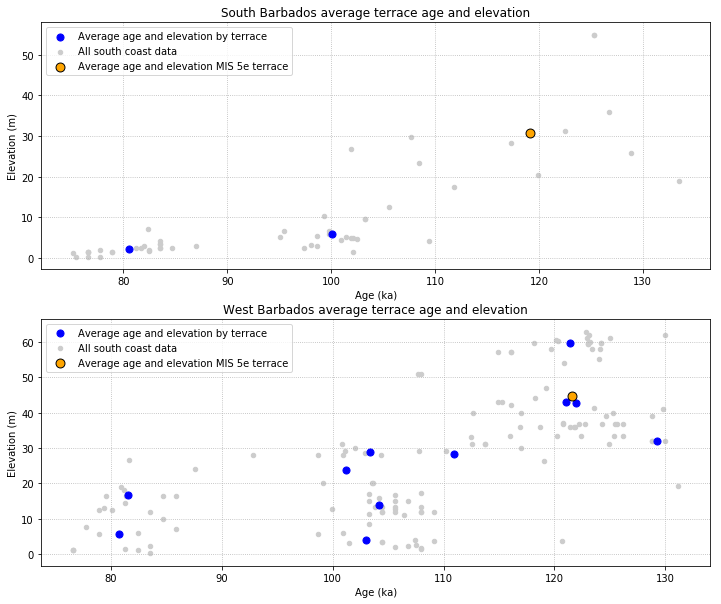

In [28]:
#Plot - Age vs. Elevation
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
ax1, ax2 = ax

#Subplot - South coast
p1 = ax1.scatter(av_ageS, av_eleS, zorder=2, s=50, color='blue')
p2 = ax1.scatter(Sbarbados_mis5['age_ka'], Sbarbados_mis5['elevation'], color='0.8', s=20, zorder=1)
p3 = ax1.scatter(Smis5e_av_age, Smis5e_av_ele, zorder=3, color='orange', s=80, edgecolor='k')
ax1.legend((p1, p2, p3), ('Average age and elevation by terrace', 'All south coast data', 'Average age and elevation MIS 5e terrace'))
ax1.grid(linestyle=':')
ax1.set_xlabel('Age (ka)')
ax1.set_ylabel('Elevation (m)')
ax1.set_title('South Barbados average terrace age and elevation')

#Subplot - West coast
p4 = ax2.scatter(av_ageW, av_eleW, zorder=2, s=50, color='blue')
p5 = ax2.scatter(Wbarbados_mis5['age_ka'], Wbarbados_mis5['elevation'], color='0.8', s=20, zorder=1)
p6 = ax2.scatter(Wmis5e_av_age, Wmis5e_av_ele, zorder=3, color='orange', s=80, edgecolor = 'k')
ax2.legend((p4, p5, p6), ('Average age and elevation by terrace', 'All south coast data', 'Average age and elevation MIS 5e terrace'))
ax2.grid(linestyle=':')
ax2.set_xlabel('Age (ka)')
ax2.set_ylabel('Elevation (m)')
ax2.set_title('West Barbados average terrace age and elevation')

### Figure 3. 
Plots of age vs. elevation of the main terraces on the south and west coasts.  The grey points plot the entire Barbados MIS 5 dataset.  Blue points show average terrace age and elevation.  Orange point shows the average age and elevation of the MIS 5e terrace on both coasts.  Note the difference in terrace elevation between the west and south coasts.

In [29]:
#Uplift calculation assuming the relative sea levels calculated for different melt scenarios

rsl_7inx = scenarios.columns.get_loc("RSL_7m")
rsl_8inx = scenarios.columns.get_loc("RSL_8m")

for i in range(0, scenarios.shape[0]):
    scenarios.loc[i, 'up_West_7m'] = ((Wmis5e_av_ele + scenarios.iloc[i, rsl_7inx])/Wmis5e_av_age)
    scenarios.loc[i, 'up_South_7m'] = ((Smis5e_av_ele + scenarios.iloc[i, rsl_7inx])/Smis5e_av_age)
    scenarios.loc[i, 'up_West_8m'] = ((Wmis5e_av_ele + scenarios.iloc[i, rsl_8inx])/Wmis5e_av_age)
    scenarios.loc[i, 'up_South_8m'] = ((Smis5e_av_ele + scenarios.iloc[i, rsl_8inx])/Smis5e_av_age)
scenarios

,GIS_contribution,AAIS_7m_contribution,RSL_7m,AAIS_8m_contribution,RSL_8m,up_West_7m,up_South_7m,up_West_8m,up_South_8m
0,0,6,8.182474,7,9.379553,0.434013,0.326204,0.443860,0.336256
1,1,5,7.990861,6,9.187940,0.432437,0.324595,0.442284,0.334647
2,2,4,7.799247,5,8.996326,0.430861,0.322986,0.440708,0.333038
3,3,3,7.607634,4,8.804713,0.429285,0.321377,0.439132,0.331429
4,4,2,7.416020,3,8.613099,0.427709,0.319768,0.437555,0.329820
5,5,1,7.224407,2,8.421486,0.426133,0.318159,0.435979,0.328211


In [30]:
#Overwrite preivous barbados mis5 dataset with the updated info by joining the south and west coast dataframe chunks
barbados_mis5 = pd.concat([Sbarbados_mis5, Wbarbados_mis5])

## Sea Level Curves
With the uplift calculated for each scenario, we can calculate the RSL as seen from the geology.  

#### Methods:
- For each scenario, correct the entire Barbados MIS 5 dataset by multiplying the age of the sample by the calculated uplift rate, treating west coast and south coast samples differently and applying the correct uplift rate respectively
- Calculate the average RSL for each terrace under each scenario
- Pull out the average RSL for the top of the MIS 5e terrace under each scenario
- Plot the 12 scenarios

In [31]:
#Add columns to Barbados dataset for the RSL_7m_1 thru RSL_8m_6
for i in range(0, 6, 1):
    s1 = 'RSL_7m_s'+str(i)
    barbados_mis5[s1] = np.nan

for i in range(0, 6, 1):
    s2 = 'RSL_8m_s'+str(i)
    barbados_mis5[s2] = np.nan

In [32]:
#indices of the 7m and 8m scenarios
rsl_7_start = barbados_mis5.columns.get_loc("RSL_7m_s0")
rsl_8_start = barbados_mis5.columns.get_loc("RSL_8m_s0")
up_west_idx7 = scenarios.columns.get_loc("up_West_7m")
up_west_idx8 = scenarios.columns.get_loc("up_West_8m")
up_south_idx7 = scenarios.columns.get_loc("up_South_7m")
up_south_idx8 = scenarios.columns.get_loc("up_South_8m")

#Full MIS 5 Barbados dataset sea level curve 
for index, row in barbados_mis5.iterrows():
    inx = barbados_mis5.index.get_loc(index)
    if row['Coast'] == 'W':
        for i in range(0, 6, 1):
            barbados_mis5.iloc[inx, (i+rsl_7_start)] = row['elevation'] - (row['age_ka']*(scenarios.iloc[i, up_west_idx7]))
            barbados_mis5.iloc[inx, (i+rsl_8_start)] = row['elevation'] - (row['age_ka']*(scenarios.iloc[i, up_west_idx8]))
    elif row['Coast'] == 'S':
        for i in range(0, 6, 1):
            barbados_mis5.iloc[inx, (i+rsl_7_start)] = row['elevation'] - (row['age_ka']*(scenarios.iloc[i, up_south_idx7]))
            barbados_mis5.iloc[inx, (i+rsl_8_start)] = row['elevation'] - (row['age_ka']*(scenarios.iloc[i, up_south_idx8]))       

In [33]:
#Create terrace groupby object
terrace_groups = barbados_mis5.groupby('terrace')

#Create terrace dataframe
ter_inx = []
for key, group in terrace_groups:
    ter_inx.append(key)
    
terrace_df = pd.DataFrame(index=ter_inx)

#Create Columns in terrace dataframe
for i in range(0, 6, 1):
    row = barbados_mis5.columns[rsl_7_start+i]
    terrace_df[row] = np.nan
    
for i in range(0, 6, 1):
    row = barbados_mis5.columns[rsl_8_start+i]
    terrace_df[row] = np.nan
terrace_df['terr_age'] = np.nan

In [34]:
#Append the terrace dataframe
for i, j in zip(terrace_groups.RSL_7m_s0.mean(), range(0, 12)):
    terrace_df.iloc[j, 0] = i
for i, j in zip(terrace_groups.RSL_7m_s1.mean(), range(0, 12)):
    terrace_df.iloc[j, 1] = i
for i, j in zip(terrace_groups.RSL_7m_s2.mean(), range(0, 12)):
    terrace_df.iloc[j, 2] = i
for i, j in zip(terrace_groups.RSL_7m_s3.mean(), range(0, 12)):
    terrace_df.iloc[j, 3] = i
for i, j in zip(terrace_groups.RSL_7m_s4.mean(), range(0, 12)):
    terrace_df.iloc[j, 4] = i
for i, j in zip(terrace_groups.RSL_7m_s5.mean(), range(0, 12)):
    terrace_df.iloc[j, 5] = i
    
for i, j in zip(terrace_groups.RSL_8m_s0.mean(), range(0, 12)):
    terrace_df.iloc[j, 6] = i
for i, j in zip(terrace_groups.RSL_8m_s1.mean(), range(0, 12)):
    terrace_df.iloc[j, 7] = i
for i, j in zip(terrace_groups.RSL_8m_s2.mean(), range(0, 12)):
    terrace_df.iloc[j, 8] = i
for i, j in zip(terrace_groups.RSL_8m_s3.mean(), range(0, 12)):
    terrace_df.iloc[j, 9] = i
for i, j in zip(terrace_groups.RSL_8m_s4.mean(), range(0, 12)):
    terrace_df.iloc[j, 10] = i
for i, j in zip(terrace_groups.RSL_8m_s5.mean(), range(0, 12)):
    terrace_df.iloc[j, 11] = i
for i, j in zip(terrace_groups.age_ka.mean(), range(0, 12)):
    terrace_df.iloc[j, 12] = i


In [35]:
#Copy the highest 5e terrace data into the scenarios dataframe
scenarios['RH_top_rsl_7m'] = list(terrace_df.iloc[8, 0:6])
scenarios['RH_top_rsl_8m'] = list(terrace_df.iloc[8, 6:12])


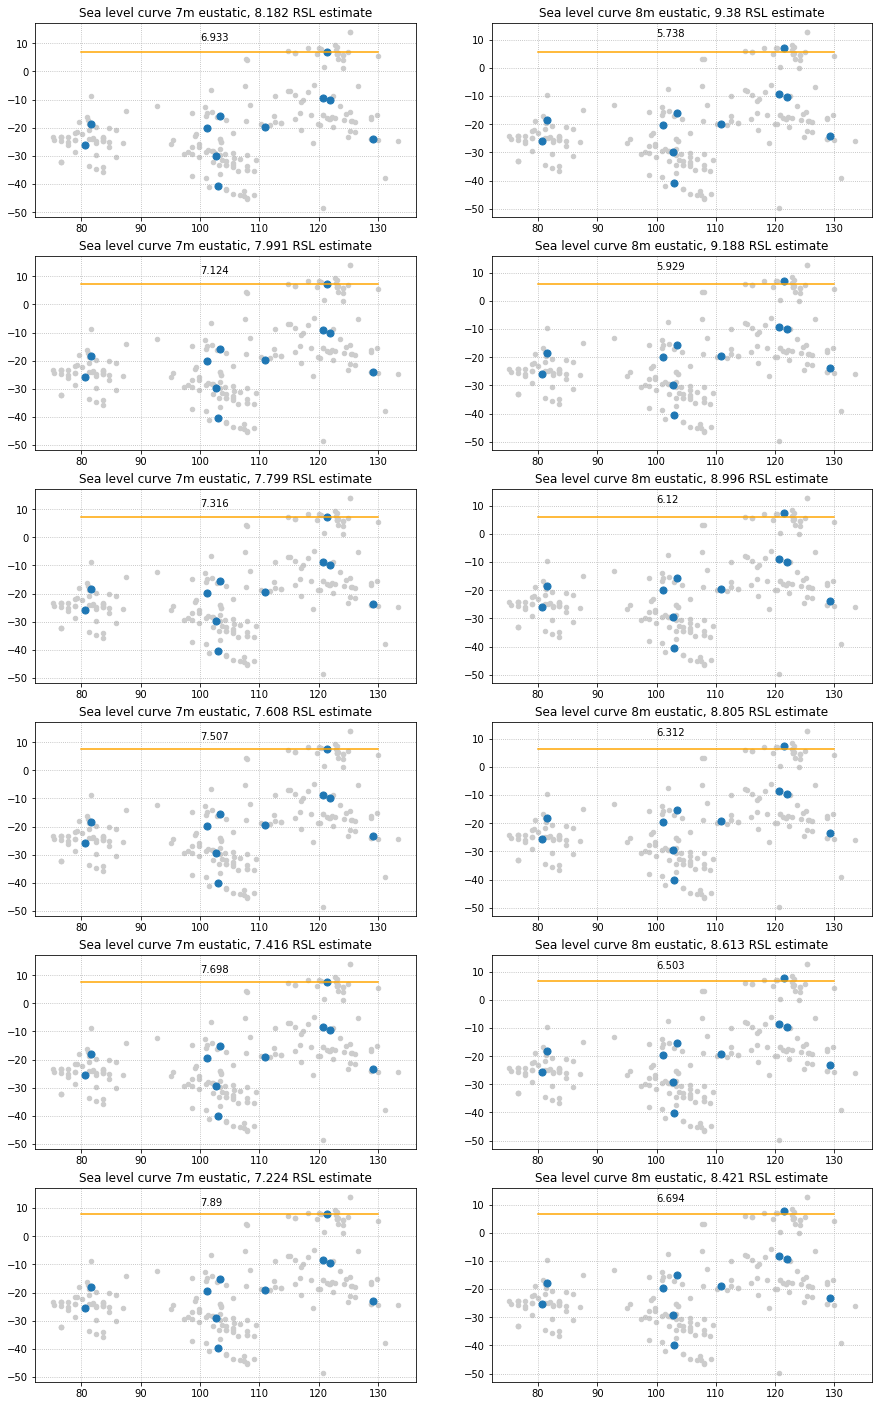

In [36]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,25))

for i in range(0, 6, 1):
    ax[i,0].scatter(barbados_mis5.age_ka, barbados_mis5.iloc[:, rsl_7_start], color='0.8', s=20, zorder=1)
    ax[i,0].scatter(terrace_df.terr_age, terrace_df.iloc[:, i], s=50, zorder=2)
    ax[i,0].plot([80, 130], [scenarios.iloc[i, 9], scenarios.iloc[i,9]], color='orange')
    ax[i,0].text(100, 11, str(round(scenarios.iloc[i,9], 3)))
    ax[i,0].set_title('Sea level curve 7m eustatic, '+ str(round(scenarios.iloc[i, 2], 3))+' RSL estimate')
    ax[i,0].grid(linestyle=':')
for i in range(0, 6, 1):
    ax[i,1].scatter(barbados_mis5.age_ka, barbados_mis5.iloc[:, rsl_8_start], color='0.8', s=20, zorder=1)
    ax[i,1].scatter(terrace_df.terr_age, terrace_df.iloc[:, i], s=50, zorder=2)
    ax[i,1].plot([80, 130], [scenarios.iloc[i, 10], scenarios.iloc[i,10]], color='orange')
    ax[i,1].text(100, 11, str(round(scenarios.iloc[i,10], 3)))
    ax[i,1].set_title('Sea level curve 8m eustatic, '+str(round(scenarios.iloc[i,4], 3))+' RSL estimate')
    ax[i,1].grid(linestyle=':')

### Figure 4. 
The results from the 12 melt scenarios.  Left column assumed GMSL of 7m; right column assumed GMSL of 8m.  The entire corrected Barbados MIS 5 dataset is plotted (grey points) along with the corrected average age and elevation of each terrace (blue).  The MIS 5e highstand minimum from the corrected geological evidence is highlighted with the orange line and its elevation.  All the points  plot minimum sea level since sea level could be higher than the highest corals.  

In [37]:
#Calculate the difference between RSL_model and RSL_geo
scenarios['RSL_misfit_7m'] = scenarios.apply(lambda row: row['RSL_7m'] - row['RH_top_rsl_7m'], axis=1)
scenarios['RSL_misfit_8m'] = scenarios.apply(lambda row: row['RSL_8m'] - row['RH_top_rsl_8m'], axis=1)

## Discussion pt. 1
   The data do show disparity between the estimated RSL from the model and the calculated RSL from the geologic record.  We can see this in the difference between these two values.  I assess this data as follows:  if the RSL_model > RSL_geo the scenario is viable, if RSL_model < RSL_geo this scenario is less viable.  This is because we could not get the coral geologic evidence above the sea level at that site.  If the RSL predicted by the geologic evidence is larger than the model, I interpret this to mean the model does not accurately fit the geologic evidence.  
   If RSL_model > RSL_geo, this model is still viable because the RSL_geo plots a minimum RSL.  The RSL_geo is a minimum because the paleo mean sea level might have been above the corals (corals growing in a few meters water depth) and therefore the mean RSL for Barbados would be a few meters higher than the coral.  
   Under these assumptions, the first run of data through these scenarios indicate that a GMSL of 7m with considerable melt contributions from Greenland are not likely, but the rest of the scenarios could have occurred.  (I note, however, it is probably more unlikely for Barbados RSL to be vastly different from GMSL, so scenarios with large/small RSL compared to GMSL of 7 or 8 are probably less likely than those that are similar.  This is because Barbados sits very close to equi-distant from the ice masses, and therefore the RSL of Barbados should be close to GMSL).
   Our RSL for 5a and 5c also align with previously published reconstructions for Barbados

## Filtered Dataset Run
As a second and more rigorous test of our melt scenarios' 'viability' I wanted to run the same analysis on a more rigorously screened subset of the Barbados MIS 5 dataset.  I screen the coral samples and select only those with closed system ages.  While I admit that a closed system age doesn't independently mean the age is reliable (for example, a coral may be open system but by chance appear to be closed system), previous studies do show increased precision and accuracy when only looking at closed system ages.  

In [38]:
#Create new filtered datasets and dataframes as to not override previous ones
BB5filt = barbados_mis5[barbados_mis5.d234Ui > (146.8-8)]
BB5filt = BB5filt[BB5filt.d234Ui < (146.8+8)]

rsl_data = {'GIS_contribution': GIS, 'AAIS_7m_contribution': AAIS_7m, 'RSL_7m': RSL_7m, 'AAIS_8m_contribution': AAIS_8m, 'RSL_8m': RSL_8m}
fscenarios = pd.DataFrame(rsl_data)

WBB5filt = BB5filt[BB5filt.Coast == 'W']
SBB5filt = BB5filt[BB5filt.Coast == 'S']

Text(0.5,1,'West Barbados average terrace age and elevation - Filtered dataset')

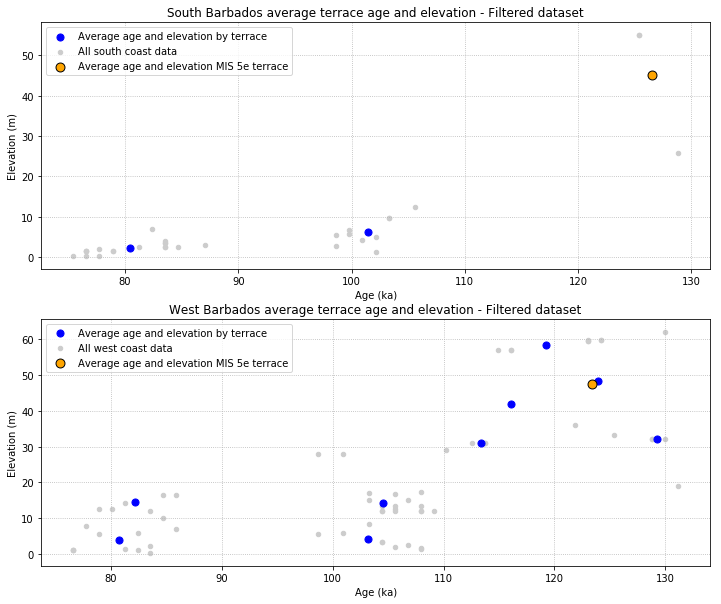

In [39]:
# terrace classification
fav_ageS = SBB5filt.groupby('terrace').age_ka.mean()
fav_eleS = SBB5filt.groupby('terrace').elevation.mean()
fav_ageW = WBB5filt.groupby('terrace').age_ka.mean()
fav_eleW = WBB5filt.groupby('terrace').elevation.mean()


#for terraces that have an average age of 122 to 130, average their elevation and age independently for the west and south coasts
#these will be the MIS5e average terrace elevation and age
fmis5e_terr = ['Rendezvous Hill', 'Rendezvous Hill (Top)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Low)']
Wf_mis5e = WBB5filt[WBB5filt.terrace.isin(fmis5e_terr)]
Sf_mis5e = SBB5filt[SBB5filt.terrace.isin(fmis5e_terr)] 

fWmis5e_av_age = Wf_mis5e.age_ka.mean()
fWmis5e_av_ele = Wf_mis5e.elevation.mean()
fSmis5e_av_age = Sf_mis5e.age_ka.mean()
fSmis5e_av_ele = Sf_mis5e.elevation.mean()

#Plot - Age vs. Elevation
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
ax1, ax2 = ax

#Subplot - South coast
p1 = ax1.scatter(fav_ageS, fav_eleS, zorder=2, s=50, color='blue')
p2 = ax1.scatter(SBB5filt['age_ka'], SBB5filt['elevation'], color='0.8', s=20, zorder=1)
p3 = ax1.scatter(fSmis5e_av_age, fSmis5e_av_ele, zorder=3, color='orange', s=80, edgecolor='k')
ax1.legend((p1, p2, p3), ('Average age and elevation by terrace', 'All south coast data', 'Average age and elevation MIS 5e terrace'))
ax1.grid(linestyle=':')
ax1.set_xlabel('Age (ka)')
ax1.set_ylabel('Elevation (m)')
ax1.set_title('South Barbados average terrace age and elevation - Filtered dataset')

#Subplot - West coast
p4 = ax2.scatter(fav_ageW, fav_eleW, zorder=2, s=50, color='blue')
p5 = ax2.scatter(WBB5filt['age_ka'], WBB5filt['elevation'], color='0.8', s=20, zorder=1)
p6 = ax2.scatter(fWmis5e_av_age, fWmis5e_av_ele, zorder=3, color='orange', s=80, edgecolor = 'k')
ax2.legend((p4, p5, p6), ('Average age and elevation by terrace', 'All west coast data', 'Average age and elevation MIS 5e terrace'))
ax2.grid(linestyle=':')
ax2.set_xlabel('Age (ka)')
ax2.set_ylabel('Elevation (m)')
ax2.set_title('West Barbados average terrace age and elevation - Filtered dataset')

### Figure 5. 
The ave vs. elevation plot for the west and south coasts using the filtered dataset (only closed system datapoints).  The full filtered dataset is plotted in grey.  The average age and elevations for each terrace are plotted in blue.  The orange point is the average age and elevation of the MIS 5e terrace.  In this filtered dataset, note the difference in elevation of the MIS 5e terrace on the south coast.  This filtered dataset yields a much higher average elevation for MIS 5e on the south coast than the unfiltered dataset.  It appears here that only 2 MIS 5e datapoints constrain that average.

In [40]:
#Calculate uplift
frsl_7inx = fscenarios.columns.get_loc("RSL_7m")
frsl_8inx = fscenarios.columns.get_loc("RSL_8m")

for i in range(0, scenarios.shape[0]):
    fscenarios.loc[i, 'up_West_7m'] = ((fWmis5e_av_ele + fscenarios.iloc[i, rsl_7inx])/fWmis5e_av_age)
    fscenarios.loc[i, 'up_South_7m'] = ((fSmis5e_av_ele + fscenarios.iloc[i, rsl_7inx])/fSmis5e_av_age)
    fscenarios.loc[i, 'up_West_8m'] = ((fWmis5e_av_ele + fscenarios.iloc[i, rsl_8inx])/fWmis5e_av_age)
    fscenarios.loc[i, 'up_South_8m'] = ((fSmis5e_av_ele + fscenarios.iloc[i, rsl_8inx])/fSmis5e_av_age)
fscenarios

,GIS_contribution,AAIS_7m_contribution,RSL_7m,AAIS_8m_contribution,RSL_8m,up_West_7m,up_South_7m,up_West_8m,up_South_8m
0,0,6,8.182474,7,9.379553,0.450037,0.422263,0.459743,0.431726
1,1,5,7.990861,6,9.187940,0.448484,0.420748,0.458189,0.430211
2,2,4,7.799247,5,8.996326,0.446930,0.419233,0.456636,0.428696
3,3,3,7.607634,4,8.804713,0.445376,0.417718,0.455082,0.427181
4,4,2,7.416020,3,8.613099,0.443823,0.416204,0.453528,0.425667
5,5,1,7.224407,2,8.421486,0.442269,0.414689,0.451975,0.424152


In [41]:
#Add columns to Barbados dataset for the RSL_7m_1 thru RSL_8m_6
for i in range(0, 6, 1):
    s1 = 'RSL_7m_s'+str(i)
    BB5filt[s1] = np.nan

for i in range(0, 6, 1):
    s2 = 'RSL_8m_s'+str(i)
    BB5filt[s2] = np.nan

In [42]:
#indices of the 7m and 8m scenarios
frsl_7_start = BB5filt.columns.get_loc("RSL_7m_s0")
frsl_8_start = BB5filt.columns.get_loc("RSL_8m_s0")
fup_west_idx7 = fscenarios.columns.get_loc("up_West_7m")
fup_west_idx8 = fscenarios.columns.get_loc("up_West_8m")
fup_south_idx7 = fscenarios.columns.get_loc("up_South_7m")
fup_south_idx8 = fscenarios.columns.get_loc("up_South_8m")

for index, row in BB5filt.iterrows():
    inx = BB5filt.index.get_loc(index)
    if row['Coast'] == 'W':
        for i in range(0, 6, 1):
            BB5filt.iloc[inx, (i+frsl_7_start)] = row['elevation'] - (row['age_ka']*(fscenarios.iloc[i, fup_west_idx7]))
            BB5filt.iloc[inx, (i+frsl_8_start)] = row['elevation'] - (row['age_ka']*(fscenarios.iloc[i, fup_west_idx8]))
    elif row['Coast'] == 'S':
        for i in range(0, 6, 1):
            BB5filt.iloc[inx, (i+frsl_7_start)] = row['elevation'] - (row['age_ka']*(fscenarios.iloc[i, fup_south_idx7]))
            BB5filt.iloc[inx, (i+frsl_8_start)] = row['elevation'] - (row['age_ka']*(fscenarios.iloc[i, fup_south_idx8]))  

In [43]:
#Create terrace groupby object 
fterrace_groups = BB5filt.groupby('terrace')

#create terrace dataframe
fter_inx = []
for key, group in fterrace_groups:
    fter_inx.append(key)
    
fterrace_df = pd.DataFrame(index=fter_inx)


In [44]:
#Create extra coluns in the dataframe
for i in range(0, 6, 1):
    row = BB5filt.columns[frsl_7_start+i]
    fterrace_df[row] = np.nan
    
for i in range(0, 6, 1):
    row = BB5filt.columns[frsl_8_start+i]
    fterrace_df[row] = np.nan
fterrace_df['terr_age'] = np.nan

In [45]:
#Calculate RSL_geo
for i, j in zip(fterrace_groups.RSL_7m_s0.mean(), range(0, 12)):
    fterrace_df.iloc[j, 0] = i
for i, j in zip(fterrace_groups.RSL_7m_s1.mean(), range(0, 12)):
    fterrace_df.iloc[j, 1] = i
for i, j in zip(fterrace_groups.RSL_7m_s2.mean(), range(0, 12)):
    fterrace_df.iloc[j, 2] = i
for i, j in zip(fterrace_groups.RSL_7m_s3.mean(), range(0, 12)):
    fterrace_df.iloc[j, 3] = i
for i, j in zip(fterrace_groups.RSL_7m_s4.mean(), range(0, 12)):
    fterrace_df.iloc[j, 4] = i
for i, j in zip(fterrace_groups.RSL_7m_s5.mean(), range(0, 12)):
    fterrace_df.iloc[j, 5] = i
    
for i, j in zip(fterrace_groups.RSL_8m_s0.mean(), range(0, 12)):
    fterrace_df.iloc[j, 6] = i
for i, j in zip(fterrace_groups.RSL_8m_s1.mean(), range(0, 12)):
    fterrace_df.iloc[j, 7] = i
for i, j in zip(fterrace_groups.RSL_8m_s2.mean(), range(0, 12)):
    fterrace_df.iloc[j, 8] = i
for i, j in zip(fterrace_groups.RSL_8m_s3.mean(), range(0, 12)):
    fterrace_df.iloc[j, 9] = i
for i, j in zip(fterrace_groups.RSL_8m_s4.mean(), range(0, 12)):
    fterrace_df.iloc[j, 10] = i
for i, j in zip(fterrace_groups.RSL_8m_s5.mean(), range(0, 12)):
    fterrace_df.iloc[j, 11] = i
for i, j in zip(fterrace_groups.age_ka.mean(), range(0, 12)):
    fterrace_df.iloc[j, 12] = i


In [46]:
#Move the MIS 5e terrace info to scenario dataframe
RH_ind = fterrace_df.index.get_loc('Rendezvous Hill (Top)')

fscenarios['RH_top_rsl_7m'] = list(fterrace_df.iloc[RH_ind, 0:6])
fscenarios['RH_top_rsl_8m'] = list(fterrace_df.iloc[RH_ind, 6:12])


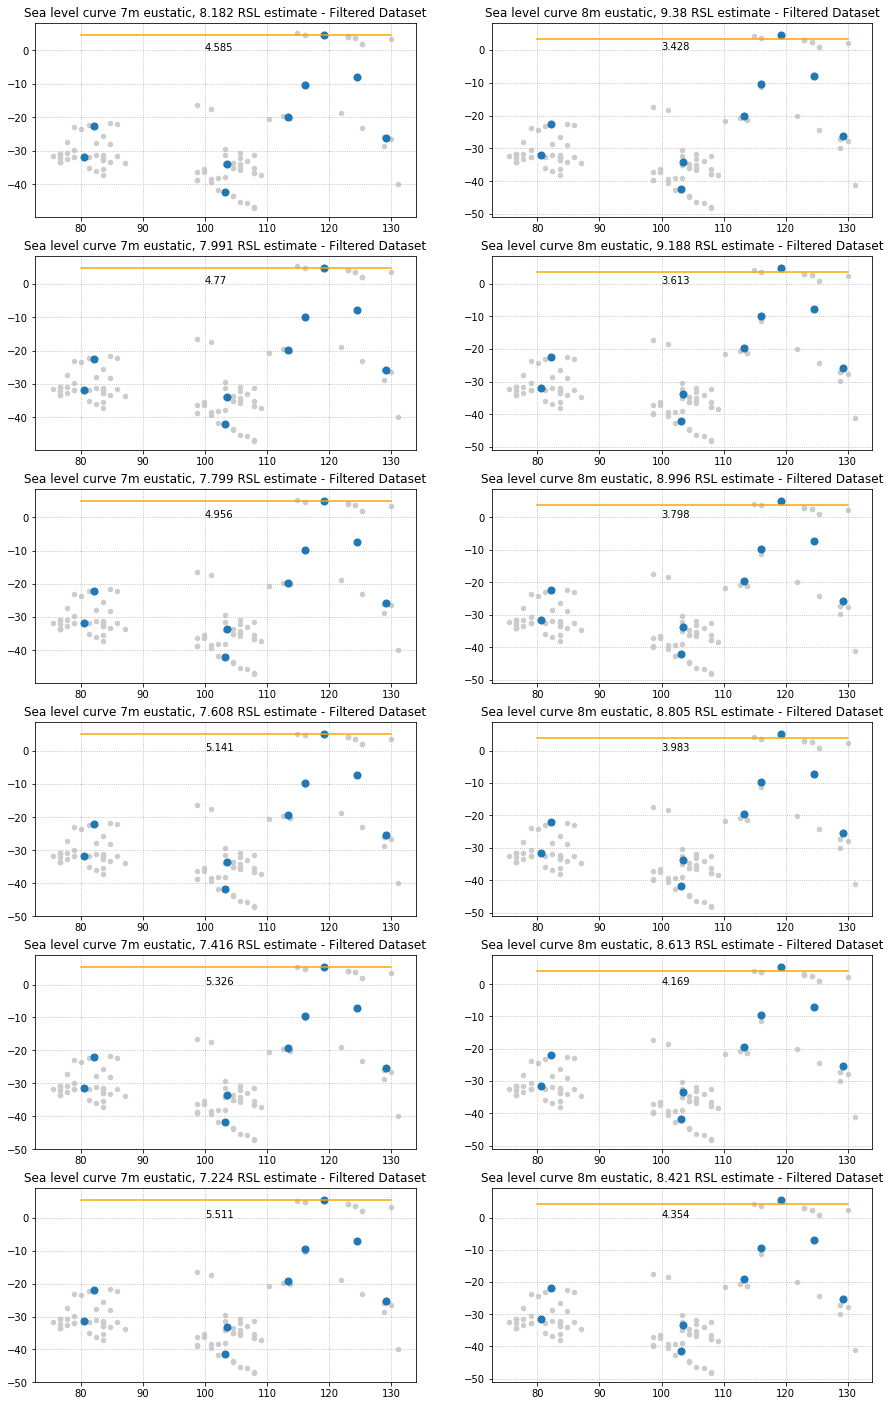

In [47]:
#Plot the filtered dataset scenarios
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,25))

for i in range(0, 6, 1):
    ax[i,0].scatter(BB5filt.age_ka, BB5filt.iloc[:, frsl_7_start], color='0.8', s=20, zorder=1)
    ax[i,0].scatter(fterrace_df.terr_age, fterrace_df.iloc[:, i], s=50, zorder=2)
    ax[i,0].plot([80, 130], [fscenarios.iloc[i, 9], fscenarios.iloc[i,9]], color='orange')
    ax[i,0].text(100, 0, str(round(fscenarios.iloc[i,9], 3)))
    ax[i,0].set_title('Sea level curve 7m eustatic, '+ str(round(fscenarios.iloc[i, 2], 3))+' RSL estimate - Filtered Dataset')
    ax[i,0].grid(linestyle=':')
for i in range(0, 6, 1):
    ax[i,1].scatter(BB5filt.age_ka, BB5filt.iloc[:, frsl_8_start], color='0.8', s=20, zorder=1)
    ax[i,1].scatter(fterrace_df.terr_age, fterrace_df.iloc[:, i], s=50, zorder=2)
    ax[i,1].plot([80, 130], [fscenarios.iloc[i, 10], fscenarios.iloc[i,10]], color='orange')
    ax[i,1].text(100, 0, str(round(fscenarios.iloc[i,10], 3)))
    ax[i,1].set_title('Sea level curve 8m eustatic, '+str(round(fscenarios.iloc[i,4], 3))+' RSL estimate - Filtered Dataset')
    ax[i,1].grid(linestyle=':')

### Figure 6. 
The results from the 12 melt scenarios when using the filtered dataset for only closed system ages. Left column assumed GMSL of 7m; right column assumed GMSL of 8m. The entire corrected Barbados MIS 5 dataset is plotted (grey points) along with the corrected average age and elevation of each terrace (blue). The MIS 5e highstand minimum from the corrected geological evidence is highlighted with the orange line and its elevation. All the points plot minimum sea level since sea level could be higher than the highest corals.

In [48]:
#Calculate the difference between RSL_model and RSL_geo
fscenarios['RSL_misfit_7m'] = fscenarios.apply(lambda row: row['RSL_7m'] - row['RH_top_rsl_7m'], axis=1)
fscenarios['RSL_misfit_8m'] = fscenarios.apply(lambda row: row['RSL_8m'] - row['RH_top_rsl_8m'], axis=1)
fscenarios

,GIS_contribution,AAIS_7m_contribution,RSL_7m,AAIS_8m_contribution,RSL_8m,up_West_7m,up_South_7m,up_West_8m,up_South_8m,RH_top_rsl_7m,RH_top_rsl_8m,RSL_misfit_7m,RSL_misfit_8m
0,0,6,8.182474,7,9.379553,0.450037,0.422263,0.459743,0.431726,4.585037,3.427694,3.597437,5.951859
1,1,5,7.990861,6,9.187940,0.448484,0.420748,0.458189,0.430211,4.770290,3.612947,3.220570,5.574993
2,2,4,7.799247,5,8.996326,0.446930,0.419233,0.456636,0.428696,4.955544,3.798200,2.843704,5.198126
3,3,3,7.607634,4,8.804713,0.445376,0.417718,0.455082,0.427181,5.140797,3.983453,2.466837,4.821259
4,4,2,7.416020,3,8.613099,0.443823,0.416204,0.453528,0.425667,5.326050,4.168706,2.089970,4.444393
5,5,1,7.224407,2,8.421486,0.442269,0.414689,0.451975,0.424152,5.511303,4.353960,1.713104,4.067526


## Discussion pt. 2
Using the filtered dataset for only closed system ages from fossil corals dramatically changes the preliminarly conclusions I had made after the first set of scenarios.  This set shows that any of the melt scenarios I tested do fit the geologic RSL data.  The RSL from the geologic data are several meters lower than the RSL_geo from the first set.  I account for this dramatic shift in data to the high elevation south coast MIS 5e terrace found in the filtered dataset (see figure 5).  Since the south coast MIS 5e terrace in the filtered dataset was only constrained by 2 points, both of which were at the highest elevations, the average MIS 5e elevation and age is probably not representative of the average.  Since the MIS 5e average age and elevation are what are used to calculate the uplift rates, my whole dataset got skewed.  When comparing the uplift rates between the two sets of scenarios, we see that the south coast uplift rates in the filtered datast are significantly higher than those calculated in the unfiltered dataset.  

Even though Barbados has been extensively studied in sea level reconstruction research, it is clear we need a better (and updated) set of coral ages to re-interpret the island.  With newer methods, more precise measurements, and updated understanding of sea level during the Last Interglacial, sea level reconstructions could benefit from updated assessments of the Barbados fossil coral reefs.  Rounding out the dataset with accurate information and careful screening may greatly contribute to our understanding of future sea level rise.

## References

Broecker W., Thurber, D.L., Goddard, J., Ku, T., Matthews, R.K. and Mesolella, K.J., 1968, Milankovitch hypothesis supported by precise dating of coral reefs and deep-sea sediments:  Science, 159(3812), 297-300.

Cheng, H., Edwards, R.L., Shen, G., Polyak, V.J., Asmerom, Y., Woodhead, J., Hellstrom., J., Wang, Y., Kong, X., Spotl, C., Wang, X. and Alexander Jr., E.C., 2013, Improvements in 230Th dating, 230Th and 234U half-life values, and U-Th isotopic measurements by multi-collector inductively coupled plasma mass spectrometry:  Earth and Planetary Science Letters, 371-372, 82-91.

Cutler, K.B., Edwards, R.L., Taylor, F.W., Cheng, H., Adkins, J., Gallup, C.D., Cutler, P.M., Burr, G.S. and Bloom, A.L., 2003, Rapid sea-level fall and deep-ocean temperature change since the last interglacial period:  Earth and Planetary Science Letters, 206, 252-271.

Dutton, A., Carlson, A.E., Long, A.J., Milne, G.A., Clark, P.U., DeConto, R., Horton, B.P., Rahmstorf, S. and Raymo., M.E., 2015, Sea-level rise due to polar ice-sheet mass loss during past warm periods:  Science, 349, 4019.1-4019.9.

Gallup, C.D., Edwards, R.L. and Johnson, R.G., 1994, The timing of high sea levels over the past 200,000 years:  Science, 263(5148), 796-800.

Matthews, R.K., 1973, Relative elvation of late Pleistocene high sea level stands:  Barbados uplift rates and their implications:  Quaternary Resarch, 3, 147-153

O'Leary, M.J., Hearty, P.J., Thompson, W.G., Raymo, M.E., MItrovica, J.X. and Webster, J.M., 2013, Ice sheet collapse following a prolonged period of stable sea level during the last interglacial:  Nature Geoscience, 6, 796-800.

Radtke, U. and Schellmann, G., 2006, Uplift history along the Clermont Nose traverse on the west coast of Barbados during the last 500,000 years - implications for paleo-sea level reconstructions:  Journal of Coastal Research, 22(2), 350-356.

Stirling, C.H. and Andersen, M.B., Urainium-series dating of fossil coral reefs: Extending the sea-level record beyond the last glacial cycle:  Earth and Planetary Science Letters, 284, 269-283.

Thompson, W.G., Spiegelman, M.W., Goldstein, S.L. and Speed, R.C., 2003, An open-system model for U-series age determinations of fossil corals:  Earth and Planetary Science Letters, 210, 365-381.

Thompson, W.G. and Goldstein, S.L., 2005, Open-system coral ages reveal persistent suborbital sea-level cycles:  Science, 208, 401-404.

Vermeersen, L.L.A. and Schotman, H.H.A, 2009, Constraints on Glacial Isostatic Agjustment for GOCE and Sea Level Data:  Pure and Applied Geophysics, 166, 1261-1281.
